In [1]:
import nltk
import html5lib
import spicy
import spacy

# Tokenizar Texto

In [2]:
# LEER TEXTO DESDE URL

from bs4 import BeautifulSoup
 
import urllib.request
  
response = urllib.request.urlopen('https://es.wikipedia.org/wiki/Wikipedia:Portada') #Obtiene el contenido HTML de la página web http://librefinanciero.com/
 
html = response.read()
 
soup = BeautifulSoup(html,"html5lib") # Limpia el texto HTML capturado
 
text = soup.get_text(strip=True)
 
print (text)

Wikipedia, la enciclopedia libredocument.documentElement.className="client-js";(function(){var cookie=document.cookie.match(/(?:^|; )eswikimwclientprefs=([^;]+)/);if(cookie){var featureName=cookie[1];document.documentElement.className=document.documentElement.className.replace(featureName+'-enabled',featureName+'-disabled');}}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"],"wgRequestId":"b83a3692-ae17-4de8-9a0e-369f99ef7de1","wgCSPNonce":false,"wgCanonicalNamespace":"Project","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":4,"wgPageName":"Wikipedia:Portada","wgTitle":"Portada","wgCurRevisionId":149134229,"wgRevisionId":149134229,"wgArticleId":2271189,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories"

In [3]:
#Crear tokens por palabras
from nltk.tokenize import word_tokenize
tokens = word_tokenize(text,"spanish")
tokens=[word.lower() for word in tokens if word.isalpha()] # Remover los signos de puntuación
print(tokens)

['wikipedia', 'la', 'enciclopedia', 'function', 'var', 'if', 'cookie', 'var', 'wgbreakframes', 'false', 'wgseparatortransformtable', 'wgdigittransformtable', 'wgdefaultdateformat', 'dmy', 'wgmonthnames', 'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre', 'wgrequestid', 'wgcspnonce', 'false', 'wgcanonicalnamespace', 'project', 'wgcanonicalspecialpagename', 'false', 'wgnamespacenumber', 'wgpagename', 'wikipedia', 'portada', 'wgtitle', 'portada', 'wgcurrevisionid', 'wgrevisionid', 'wgarticleid', 'wgisarticle', 'true', 'wgisredirect', 'false', 'wgaction', 'view', 'wgusername', 'null', 'wgusergroups', 'wgcategories', 'wgpagecontentlanguage', 'es', 'wgpagecontentmodel', 'wikitext', 'wgrelevantpagename', 'wikipedia', 'portada', 'wgrelevantarticleid', 'wgisprobablyeditable', 'false', 'wgrelevantpageisprobablyeditable', 'false', 'wgrestrictionedit', 'sysop', 'wgrestrictionmove', 'sysop', 'wgismainpage', 'true', 'wgvisuale

In [4]:
#Verificar frecuencia de palabras 
freq = nltk.FreqDist(tokens)
for key,val in freq.items():
    print (str(key) + ':' + str(val))

wikipedia:7
la:29
enciclopedia:3
function:4
var:2
if:1
cookie:1
wgbreakframes:1
false:16
wgseparatortransformtable:1
wgdigittransformtable:1
wgdefaultdateformat:1
dmy:1
wgmonthnames:1
enero:1
febrero:1
marzo:31
abril:1
mayo:1
junio:1
julio:1
agosto:1
septiembre:2
octubre:1
noviembre:1
diciembre:1
wgrequestid:1
wgcspnonce:1
wgcanonicalnamespace:1
project:1
wgcanonicalspecialpagename:1
wgnamespacenumber:1
wgpagename:1
portada:9
wgtitle:1
wgcurrevisionid:1
wgrevisionid:1
wgarticleid:1
wgisarticle:1
true:16
wgisredirect:1
wgaction:1
view:1
wgusername:1
null:1
wgusergroups:1
wgcategories:1
wgpagecontentlanguage:1
es:10
wgpagecontentmodel:1
wikitext:1
wgrelevantpagename:1
wgrelevantarticleid:1
wgisprobablyeditable:1
wgrelevantpageisprobablyeditable:1
wgrestrictionedit:1
sysop:2
wgrestrictionmove:1
wgismainpage:1
wgvisualeditor:1
pagelanguagecode:1
pagelanguagedir:1
ltr:1
pagevariantfallbacks:1
wgmfdisplaywikibasedescriptions:1
search:1
watchlist:1
tagline:1
nearby:1
wgwmeschemaeditattemptste

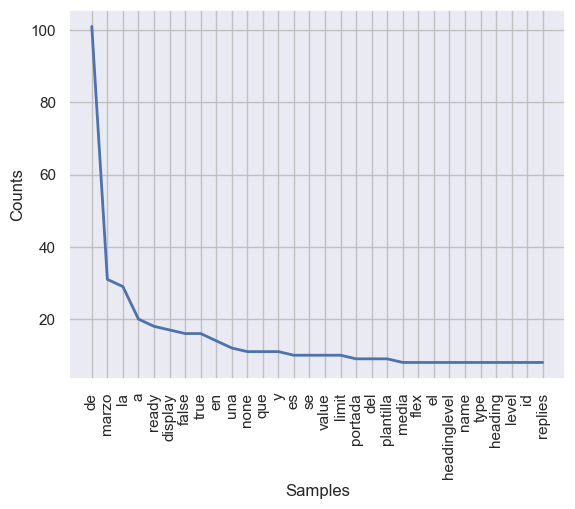

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [5]:
#Visualizar Tokens
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
freq.plot(30, cumulative=False)

# 2. Eliminar Palabras de Parada

In [6]:
from nltk.corpus import stopwords

clean_tokens = tokens[:]
 
for token in tokens:
 
    if token in stopwords.words('spanish'):
 
        clean_tokens.remove(token)

In [7]:
print(clean_tokens)

['wikipedia', 'enciclopedia', 'function', 'var', 'if', 'cookie', 'var', 'wgbreakframes', 'false', 'wgseparatortransformtable', 'wgdigittransformtable', 'wgdefaultdateformat', 'dmy', 'wgmonthnames', 'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre', 'wgrequestid', 'wgcspnonce', 'false', 'wgcanonicalnamespace', 'project', 'wgcanonicalspecialpagename', 'false', 'wgnamespacenumber', 'wgpagename', 'wikipedia', 'portada', 'wgtitle', 'portada', 'wgcurrevisionid', 'wgrevisionid', 'wgarticleid', 'wgisarticle', 'true', 'wgisredirect', 'false', 'wgaction', 'view', 'wgusername', 'null', 'wgusergroups', 'wgcategories', 'wgpagecontentlanguage', 'wgpagecontentmodel', 'wikitext', 'wgrelevantpagename', 'wikipedia', 'portada', 'wgrelevantarticleid', 'wgisprobablyeditable', 'false', 'wgrelevantpageisprobablyeditable', 'false', 'wgrestrictionedit', 'sysop', 'wgrestrictionmove', 'sysop', 'wgismainpage', 'true', 'wgvisualeditor', 'pag

In [8]:
#Verificar frecuencia de palabras 
freq_clean = nltk.FreqDist(clean_tokens)
for key,val in freq_clean.items():
    print (str(key) + ':' + str(val))

wikipedia:7
enciclopedia:3
function:4
var:2
if:1
cookie:1
wgbreakframes:1
false:16
wgseparatortransformtable:1
wgdigittransformtable:1
wgdefaultdateformat:1
dmy:1
wgmonthnames:1
enero:1
febrero:1
marzo:31
abril:1
mayo:1
junio:1
julio:1
agosto:1
septiembre:2
octubre:1
noviembre:1
diciembre:1
wgrequestid:1
wgcspnonce:1
wgcanonicalnamespace:1
project:1
wgcanonicalspecialpagename:1
wgnamespacenumber:1
wgpagename:1
portada:9
wgtitle:1
wgcurrevisionid:1
wgrevisionid:1
wgarticleid:1
wgisarticle:1
true:16
wgisredirect:1
wgaction:1
view:1
wgusername:1
null:1
wgusergroups:1
wgcategories:1
wgpagecontentlanguage:1
wgpagecontentmodel:1
wikitext:1
wgrelevantpagename:1
wgrelevantarticleid:1
wgisprobablyeditable:1
wgrelevantpageisprobablyeditable:1
wgrestrictionedit:1
sysop:2
wgrestrictionmove:1
wgismainpage:1
wgvisualeditor:1
pagelanguagecode:1
pagelanguagedir:1
ltr:1
pagevariantfallbacks:1
wgmfdisplaywikibasedescriptions:1
search:1
watchlist:1
tagline:1
nearby:1
wgwmeschemaeditattemptstepoversample:

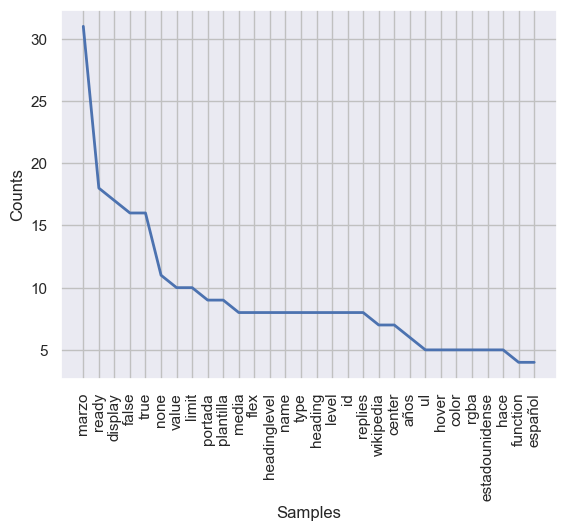

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [9]:
#Visualizar Tokens
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
freq_clean.plot(30, cumulative=False)

# 3a. Obtener Sinónimos

In [10]:
from nltk.corpus import wordnet
 
synonyms = []
 
for syn in wordnet.synsets('error'):

    for lemma in syn.lemmas():
 
        synonyms.append(lemma.name())
 
print(synonyms)

['mistake', 'error', 'fault', 'erroneousness', 'error', 'error', 'erroneous_belief', 'error', 'misplay', 'error', 'wrongdoing', 'error', 'computer_error', 'error', 'mistake']


In [11]:
#Reemplazar tokens sinónimos
for ind,sin in enumerate(synonyms):
    clean_tokens_sin = [word.replace(synonyms[ind],'error') for word in clean_tokens]

In [12]:
#Reemplazar tokens sinónimos manual
sinonimos = ['libertad', 'independencia']
for ind,sin in enumerate(sinonimos):
    clean_tokens_sin = [word.replace(sinonimos[ind],'libertad') for word in clean_tokens]

In [13]:
#Recalcular frecuencia de palabras con sinónimos agregados
freq_clean_sin = nltk.FreqDist(clean_tokens_sin)
for key,val in freq_clean_sin.items():
    print (str(key) + ':' + str(val))

wikipedia:7
enciclopedia:3
function:4
var:2
if:1
cookie:1
wgbreakframes:1
false:16
wgseparatortransformtable:1
wgdigittransformtable:1
wgdefaultdateformat:1
dmy:1
wgmonthnames:1
enero:1
febrero:1
marzo:31
abril:1
mayo:1
junio:1
julio:1
agosto:1
septiembre:2
octubre:1
noviembre:1
diciembre:1
wgrequestid:1
wgcspnonce:1
wgcanonicalnamespace:1
project:1
wgcanonicalspecialpagename:1
wgnamespacenumber:1
wgpagename:1
portada:9
wgtitle:1
wgcurrevisionid:1
wgrevisionid:1
wgarticleid:1
wgisarticle:1
true:16
wgisredirect:1
wgaction:1
view:1
wgusername:1
null:1
wgusergroups:1
wgcategories:1
wgpagecontentlanguage:1
wgpagecontentmodel:1
wikitext:1
wgrelevantpagename:1
wgrelevantarticleid:1
wgisprobablyeditable:1
wgrelevantpageisprobablyeditable:1
wgrestrictionedit:1
sysop:2
wgrestrictionmove:1
wgismainpage:1
wgvisualeditor:1
pagelanguagecode:1
pagelanguagedir:1
ltr:1
pagevariantfallbacks:1
wgmfdisplaywikibasedescriptions:1
search:1
watchlist:1
tagline:1
nearby:1
wgwmeschemaeditattemptstepoversample:

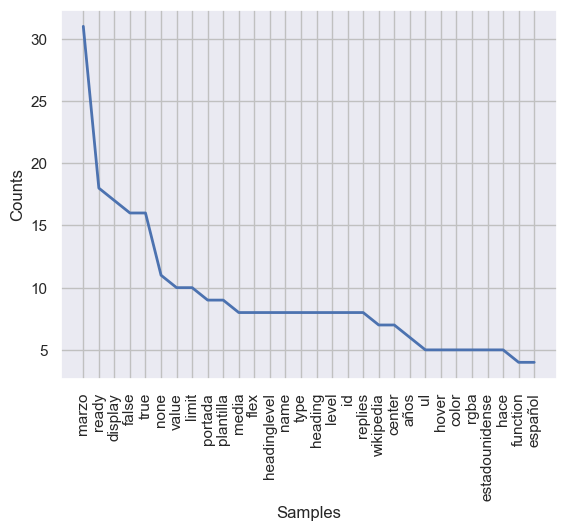

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [14]:
#Visualizar Tokens
freq_clean_sin.plot(30, cumulative=False)

# 3b. Obtener Antónimos

In [15]:
from nltk.corpus import wordnet
 
antonyms = []
 
for syn in wordnet.synsets("good"):
 
    for l in syn.lemmas():
 
        if l.antonyms():
 
            antonyms.append(l.antonyms()[0].name())
 
print(antonyms)

['evil', 'evilness', 'bad', 'badness', 'bad', 'evil', 'ill']


# 4. Derivación Regresiva

In [16]:
from nltk.stem import PorterStemmer
 
stemmer = PorterStemmer()
 
print(stemmer.stem('eating'))

eat


In [17]:
#Derivación regresiva textos en español
from nltk.stem import SnowballStemmer
 
spanish_stemmer = SnowballStemmer('spanish')
 
print(spanish_stemmer.stem("trabajando"))
print(spanish_stemmer.stem("trabajo"))

trabaj
trabaj


In [18]:
clean_tokens_sin_stems = [spanish_stemmer.stem(token) for token in clean_tokens_sin]

In [19]:
clean_tokens_sin_stems

['wikipedi',
 'enciclopedi',
 'function',
 'var',
 'if',
 'cooki',
 'var',
 'wgbreakfram',
 'fals',
 'wgseparatortransformt',
 'wgdigittransformt',
 'wgdefaultdateformat',
 'dmy',
 'wgmonthnam',
 'ener',
 'febrer',
 'marz',
 'abril',
 'may',
 'juni',
 'juli',
 'agost',
 'septiembr',
 'octubr',
 'noviembr',
 'diciembr',
 'wgrequest',
 'wgcspnonc',
 'fals',
 'wgcanonicalnamespac',
 'project',
 'wgcanonicalspecialpagenam',
 'fals',
 'wgnamespacenumb',
 'wgpagenam',
 'wikipedi',
 'port',
 'wgtitl',
 'port',
 'wgcurrevision',
 'wgrevision',
 'wgarticl',
 'wgisarticl',
 'tru',
 'wgisredirect',
 'fals',
 'wgaction',
 'view',
 'wgusernam',
 'null',
 'wgusergroups',
 'wgcategori',
 'wgpagecontentlanguag',
 'wgpagecontentmodel',
 'wikitext',
 'wgrelevantpagenam',
 'wikipedi',
 'port',
 'wgrelevantarticl',
 'wgisprobablyedit',
 'fals',
 'wgrelevantpageisprobablyedit',
 'fals',
 'wgrestrictionedit',
 'sysop',
 'wgrestrictionmov',
 'sysop',
 'wgismainpag',
 'tru',
 'wgvisualeditor',
 'pagelanguagec

wikipedi:7
enciclopedi:3
function:4
var:2
if:1
cooki:2
wgbreakfram:1
fals:16
wgseparatortransformt:1
wgdigittransformt:1
wgdefaultdateformat:1
dmy:1
wgmonthnam:1
ener:1
febrer:1
marz:31
abril:1
may:1
juni:1
juli:1
agost:1
septiembr:2
octubr:1
noviembr:1
diciembr:1
wgrequest:1
wgcspnonc:1
wgcanonicalnamespac:1
project:1
wgcanonicalspecialpagenam:1
wgnamespacenumb:1
wgpagenam:1
port:9
wgtitl:1
wgcurrevision:1
wgrevision:1
wgarticl:1
wgisarticl:1
tru:16
wgisredirect:1
wgaction:1
view:1
wgusernam:1
null:1
wgusergroups:1
wgcategori:1
wgpagecontentlanguag:1
wgpagecontentmodel:1
wikitext:1
wgrelevantpagenam:1
wgrelevantarticl:1
wgisprobablyedit:1
wgrelevantpageisprobablyedit:1
wgrestrictionedit:1
sysop:2
wgrestrictionmov:1
wgismainpag:1
wgvisualeditor:1
pagelanguagecod:1
pagelanguaged:1
ltr:1
pagevariantfallbacks:1
wgmfdisplaywikibasedescriptions:1
search:1
watchlist:1
taglin:1
nearby:1
wgwmeschemaeditattemptstepoversampl:1
wgwmepagelength:1
wgnoticeproject:1
wgmediavieweronclick:1
wgmediavie

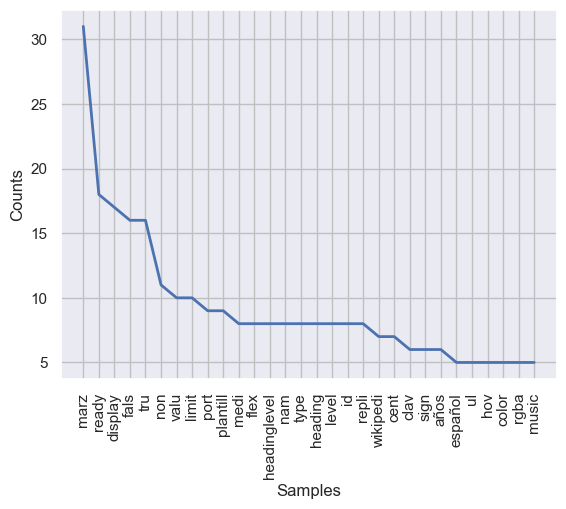

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
# Recalcular frecuencia de palabras con sinónimos agregados
freq_clean_sin_stems = nltk.FreqDist(clean_tokens_sin_stems)
for key,val in freq_clean_sin_stems.items():
    print (str(key) + ':' + str(val))
    
#Visualizar Tokens
freq_clean_sin_stems.plot(30, cumulative=False)

# 5. Lematizar palabras

In [21]:
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()
 
print(lemmatizer.lemmatize('working', pos="v")) #sustantivos de manera predeterminada, especificar "v" si se quieren los verbos

work


In [22]:
#Alternativa para texto en español --- Instalar spicy: pip install spicy
import spicy
import spacy
nlp = spacy.blank('es')


In [23]:
#Lematizar tokens tras limpieza y convertidos los sinónimos
clean_tokens_sin_lem = []
separator = ' '
for token in nlp(separator.join(clean_tokens_sin)): #Se juntan los tokens en una string, string es el formato necesario para nlp
    print(token.text, token.lemma_, token.pos_)
    clean_tokens_sin_lem.append(token.lemma_)

wikipedia  
enciclopedia  
function  
var  
if  
cookie  
var  
wgbreakframes  
false  
wgseparatortransformtable  
wgdigittransformtable  
wgdefaultdateformat  
dmy  
wgmonthnames  
enero  
febrero  
marzo  
abril  
mayo  
junio  
julio  
agosto  
septiembre  
octubre  
noviembre  
diciembre  
wgrequestid  
wgcspnonce  
false  
wgcanonicalnamespace  
project  
wgcanonicalspecialpagename  
false  
wgnamespacenumber  
wgpagename  
wikipedia  
portada  
wgtitle  
portada  
wgcurrevisionid  
wgrevisionid  
wgarticleid  
wgisarticle  
true  
wgisredirect  
false  
wgaction  
view  
wgusername  
null  
wgusergroups  
wgcategories  
wgpagecontentlanguage  
wgpagecontentmodel  
wikitext  
wgrelevantpagename  
wikipedia  
portada  
wgrelevantarticleid  
wgisprobablyeditable  
false  
wgrelevantpageisprobablyeditable  
false  
wgrestrictionedit  
sysop  
wgrestrictionmove  
sysop  
wgismainpage  
true  
wgvisualeditor  
pagelanguagecode  
pagelanguagedir  
ltr  
pagevariantfallbacks  
wgmfdispl

:923


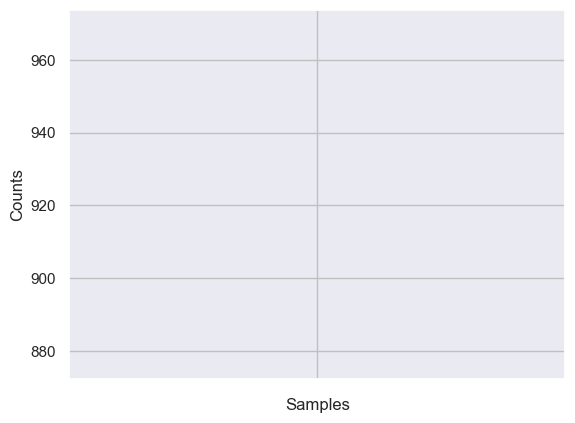

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
# Recalcular frecuencia de palabras con sinónimos agregados
freq_clean_sin_lem = nltk.FreqDist(clean_tokens_sin_lem)
for key,val in freq_clean_sin_lem.items():
    print (str(key) + ':' + str(val))
    
#Visualizar Tokens
freq_clean_sin_lem.plot(30, cumulative=False)